**HANDWRITTEN DIGIT RECOGNITION USING MULTILAYER PERCEPTRON**

*Dataset:*

The MNIST dataset is a classic dataset extensively used in machine learning for training and testing models, particularly in the field of computer vision. It stands for Modified National Institute of Standards and Technology database. The dataset is a collection of handwritten digits, comprising 60,000 training images and 10,000 testing images.

Each image in the MNIST dataset is a grayscale image with a size of 28x28 pixels. These images contain handwritten digits from 0 to 9, and each image is associated with a corresponding label indicating the digit it represents.

The MNIST dataset is commonly used as a benchmark for various machine learning algorithms, especially for tasks related to image classification and digit recognition. Researchers and practitioners often use it to develop and test models to recognize and classify handwritten digits accurately.

Due to its simplicity and accessibility, the MNIST dataset serves as a starting point for beginners in the field of machine learning, providing a foundational understanding of image-based classification tasks. Its widespread use has led to the development of numerous state-of-the-art algorithms and techniques in the realm of deep learning and computer vision.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [2]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Build a simple neural network model
def build_model():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28, 1)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [4]:
# Train the model
def train_model(model, epochs, batch_size):
    history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
    return history

In [5]:
# Function to plot accuracy
def plot_accuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

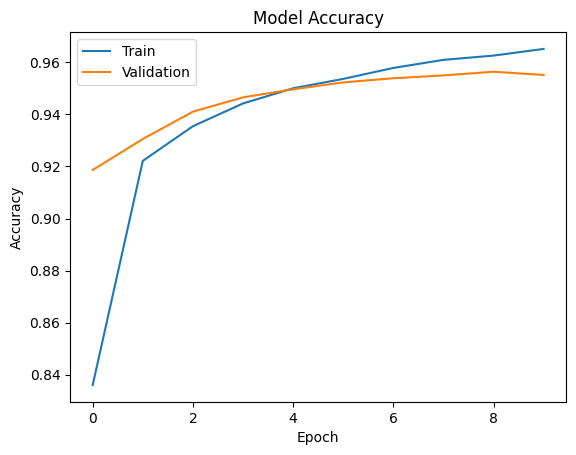

In [6]:
# Train the initial model
epochs = 10
batch_size = 128
model = build_model()
history = train_model(model, epochs, batch_size)
plot_accuracy(history)

Epochs: 15, Batch Size: 32


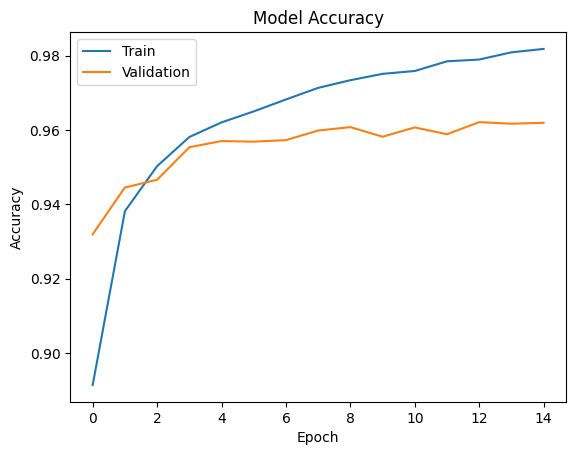

Epochs: 15, Batch Size: 64


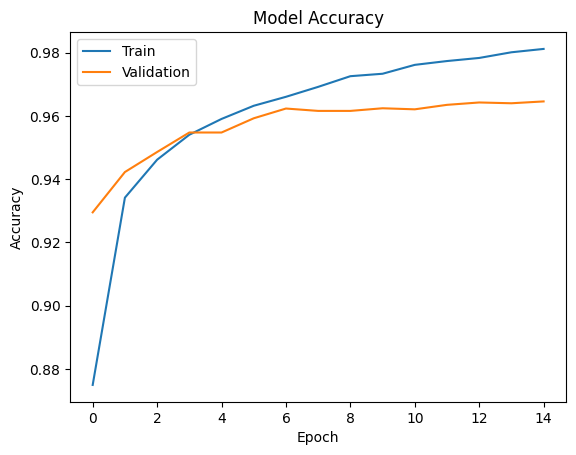

Epochs: 20, Batch Size: 32


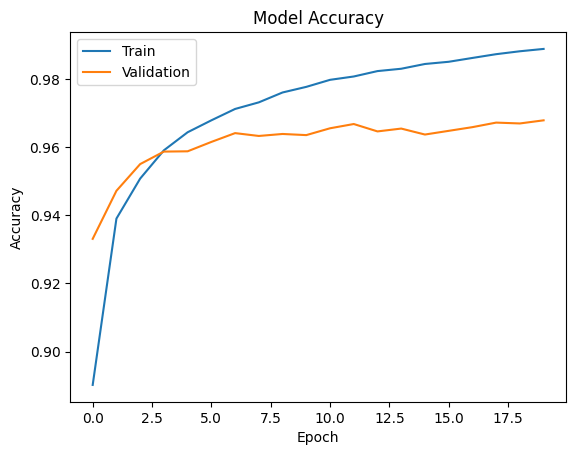

Epochs: 20, Batch Size: 64


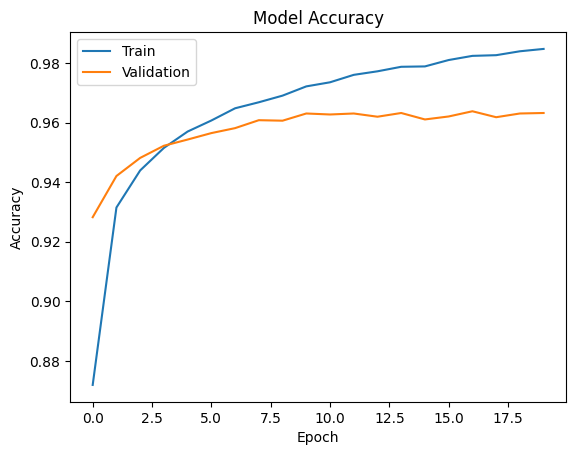

In [ ]:
# Define different epoch and batch sizes
epoch_values = [15, 20, ]
batch_sizes = [32, 64]

# Train models with different epoch and batch sizes
for epoch in epoch_values:
    for batch_size in batch_sizes:
        model = build_model()
        history = train_model(model, epoch, batch_size)
        print(f'Epochs: {epoch}, Batch Size: {batch_size}')
        plot_accuracy(history)

Number of Layers: 1


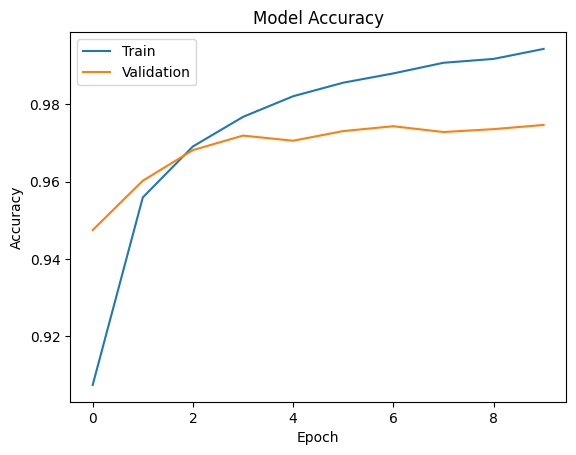

Number of Layers: 2


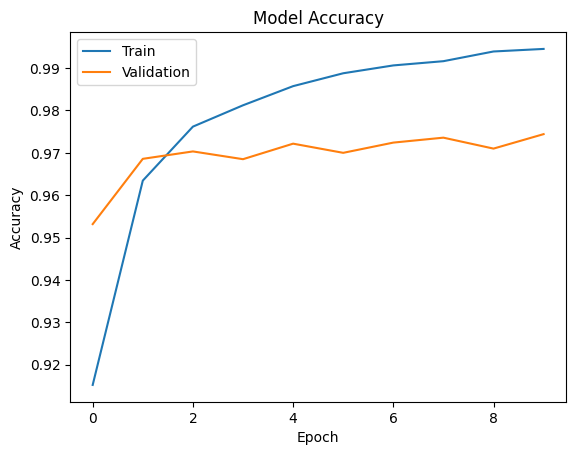

In [ ]:
# Define different numbers of layers
layer_counts = [1, 2]

# Train models with different numbers of layers
for num_layers in layer_counts:
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28, 1)))
    for _ in range(num_layers):
        model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = train_model(model, epochs, batch_size)
    print(f'Number of Layers: {num_layers}')
    plot_accuracy(history)

Activation Function: relu


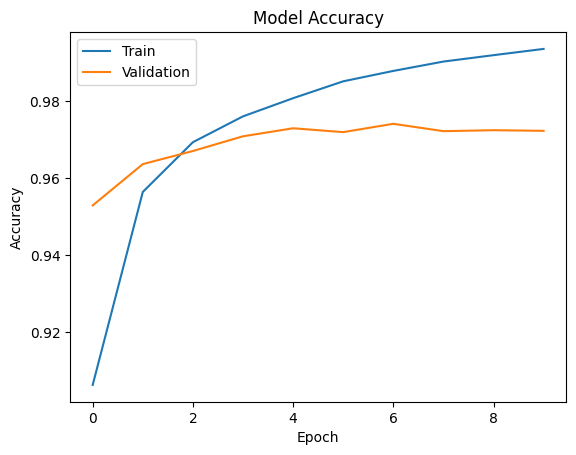

Activation Function: sigmoid


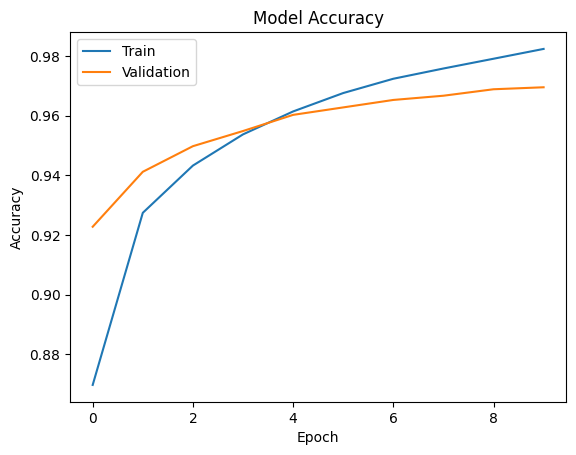

Activation Function: tanh


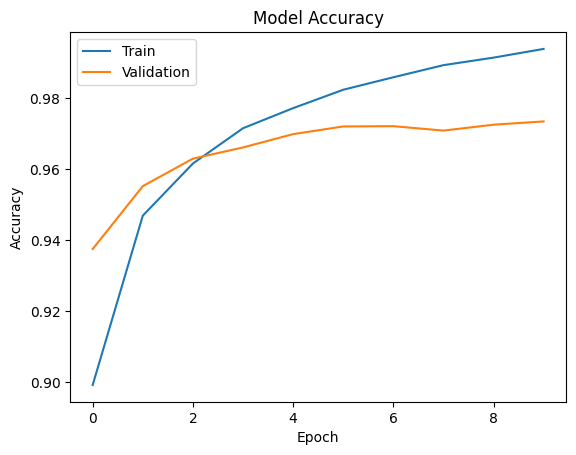

In [ ]:
# Define different activation functions
activation_functions = ['relu', 'sigmoid', 'tanh']

# Train models with different activation functions
for activation_func in activation_functions:
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28, 1)))
    model.add(Dense(128, activation=activation_func))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = train_model(model, epochs, batch_size)
    print(f'Activation Function: {activation_func}')
    plot_accuracy(history)

Weight Initialization: random_normal


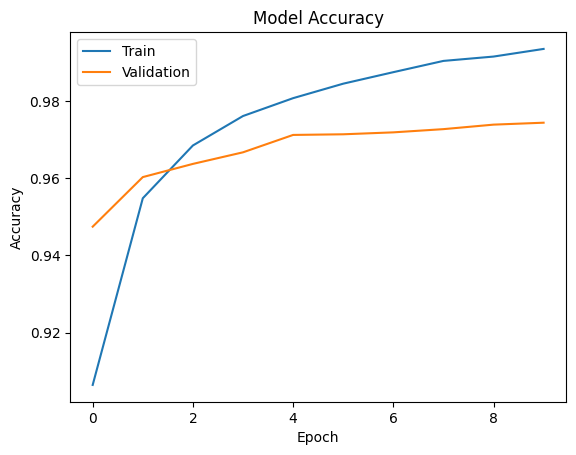

Weight Initialization: glorot_normal


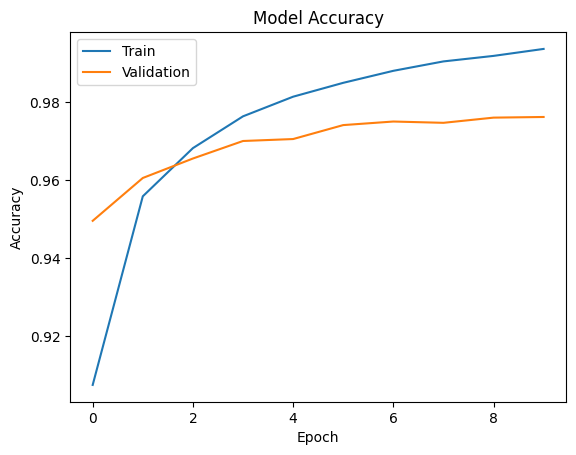

Weight Initialization: he_normal


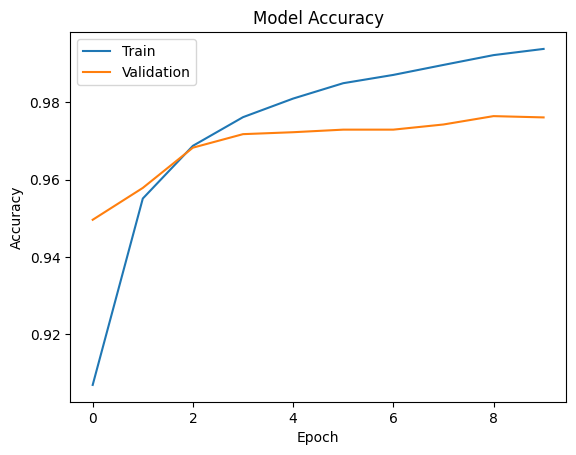

In [ ]:
# Define different weight initializations
weight_initializations = ['random_normal', 'glorot_normal', 'he_normal']

# Train models with different weight initializations
for initialization in weight_initializations:
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28, 1)))
    model.add(Dense(128, activation='relu', kernel_initializer=initialization))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = train_model(model, epochs, batch_size)
    print(f'Weight Initialization: {initialization}')
    plot_accuracy(history)


With Batch Normalization


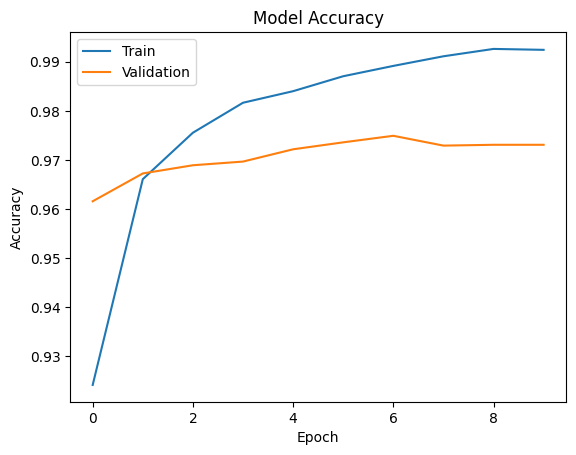

Without Batch Normalization


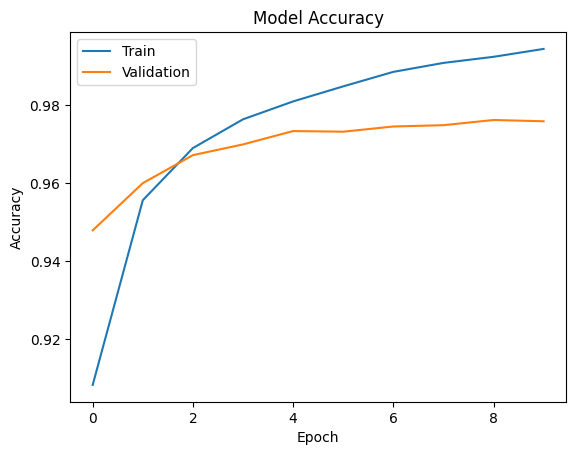

In [ ]:
# Train models with and without batch normalization
for use_batch_norm in [True, False]:
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28, 1)))
    model.add(Dense(128, activation='relu'))

    if use_batch_norm:
        model.add(keras.layers.BatchNormalization())

    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = train_model(model, epochs, batch_size)
    print(f'With Batch Normalization' if use_batch_norm else 'Without Batch Normalization')
    plot_accuracy(history)

Optimizer: adam


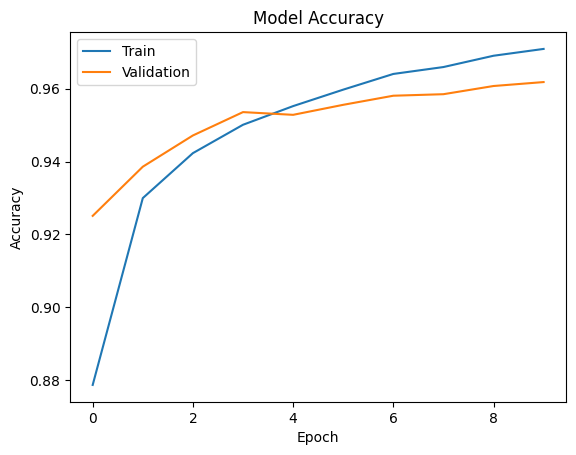

Optimizer: sgd


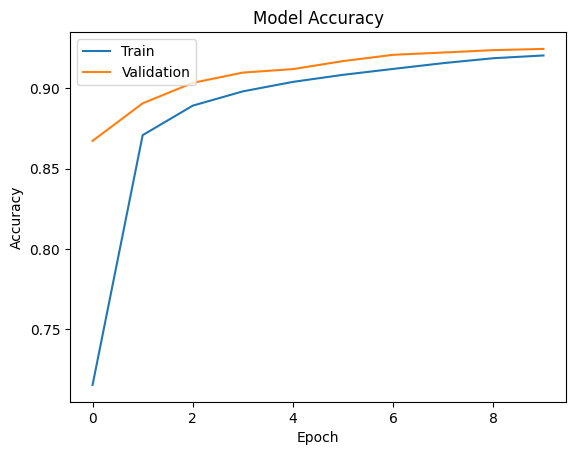

Optimizer: rmsprop


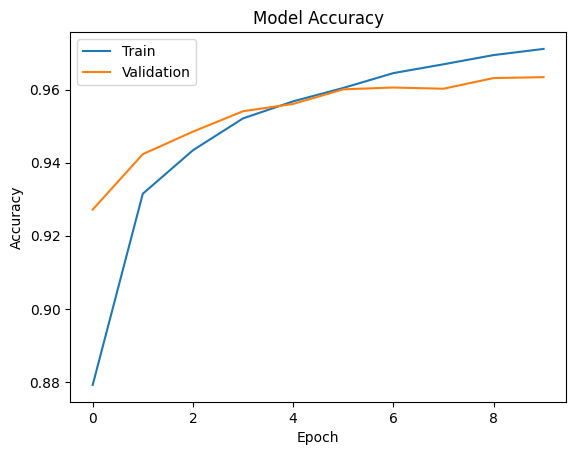

In [ ]:
# Define different optimizers
optimizers = ['adam', 'sgd', 'rmsprop']

# Train models with different optimizers
for optimizer_name in optimizers:
    model = build_model()
    model.compile(optimizer=optimizer_name, loss='categorical_crossentropy', metrics=['accuracy'])
    history = train_model(model, epochs, batch_size)
    print(f'Optimizer: {optimizer_name}')
    plot_accuracy(history)


Learning Rate: 0.001


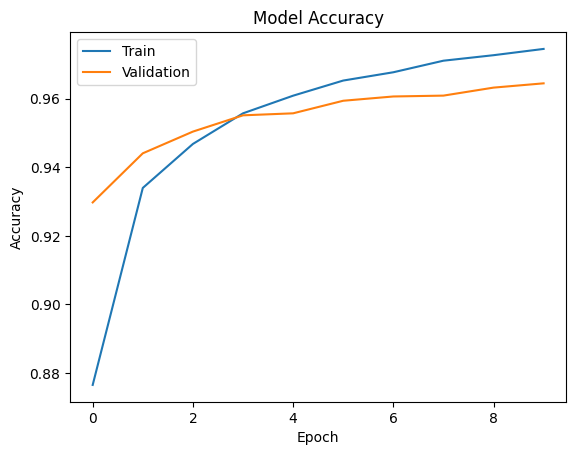

Learning Rate: 0.01


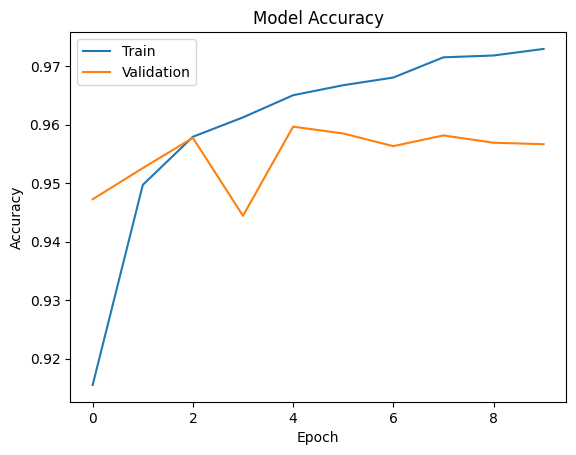

Learning Rate: 0.1


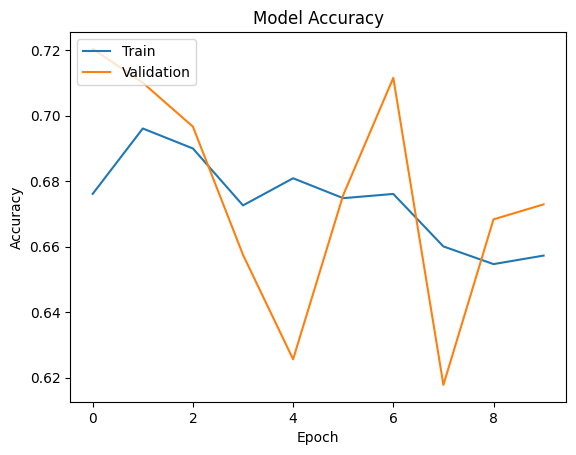

In [ ]:
# Define different learning rates
learning_rates = [0.001, 0.01, 0.1]

# Train models with different learning rates
for lr in learning_rates:
    optimizer = keras.optimizers.Adam(learning_rate=lr)
    model = build_model()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    history = train_model(model, epochs, batch_size)
    print(f'Learning Rate: {lr}')
    plot_accuracy(history)

L1 Regularization


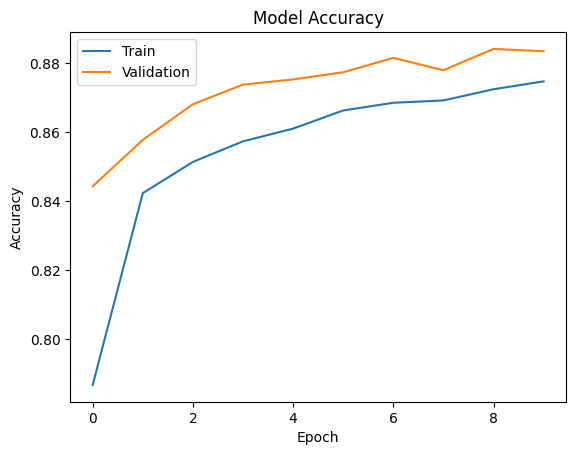

L2 Regularization


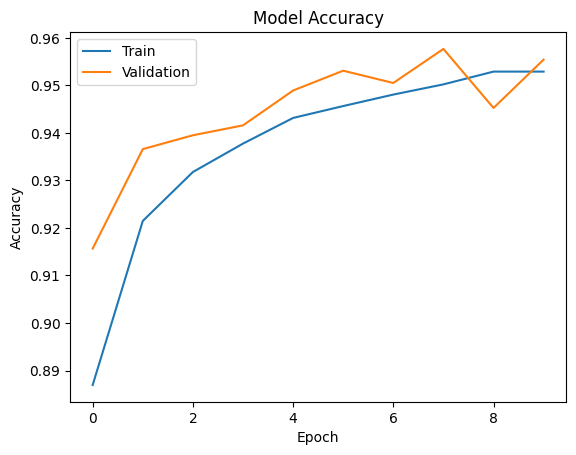

In [ ]:
from tensorflow.keras import regularizers

# Train models with L1 and L2 regularization
model_l1 = Sequential()
model_l1.add(Flatten(input_shape=(28, 28, 1)))
model_l1.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l1()))
model_l1.add(Dense(10, activation='softmax'))
model_l1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_l1 = train_model(model_l1, epochs, batch_size)
print(f'L1 Regularization')
plot_accuracy(history_l1)

model_l2 = Sequential()
model_l2.add(Flatten(input_shape=(28, 28, 1)))
model_l2.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2()))
model_l2.add(Dense(10, activation='softmax'))
model_l2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_l2 = train_model(model_l2, epochs, batch_size)
print(f'L2 Regularization')
plot_accuracy(history_l2)

Dropout Rate: 0.2


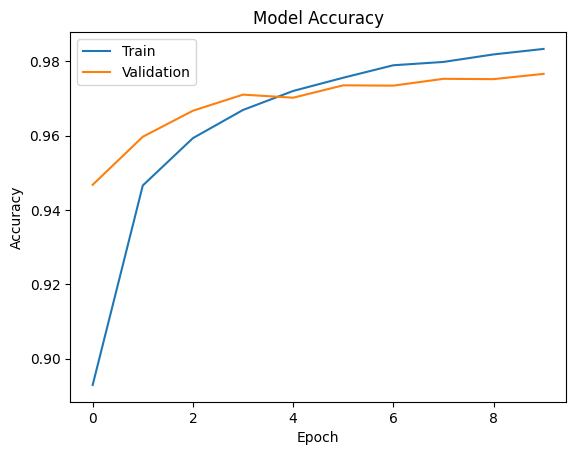

Dropout Rate: 0.4


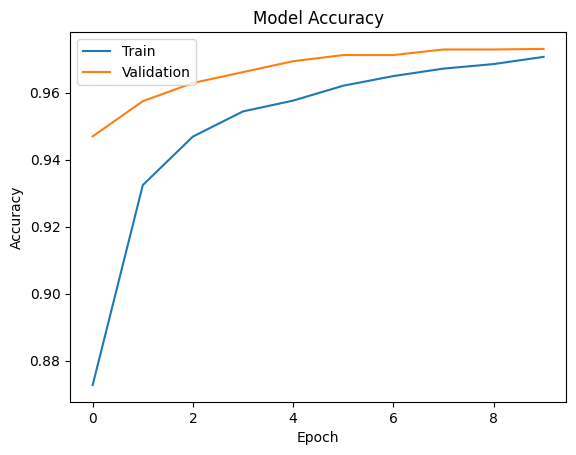

Dropout Rate: 0.6


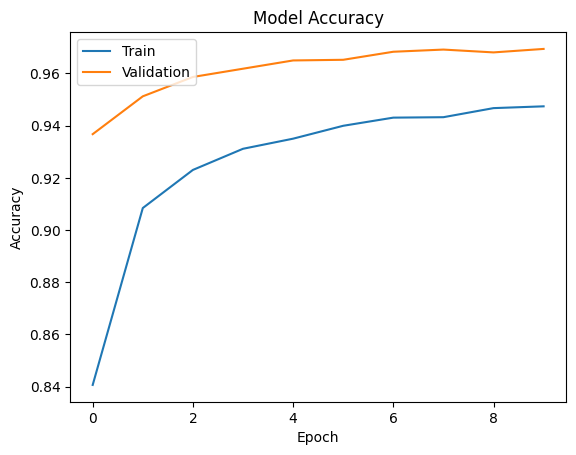

In [ ]:
from tensorflow.keras.layers import Dropout

# Define different dropout rates
dropout_rates = [0.2, 0.4, 0.6]

# Train models with different dropout rates
for dropout_rate in dropout_rates:
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28, 1)))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = train_model(model, epochs, batch_size)
    print(f'Dropout Rate: {dropout_rate}')
    plot_accuracy(history)


In [7]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

# Define specific values for each parameter
epochs = 20
batch_size = 32
num_layers = 2
nodes = 32
activation_func = 'sigmoid'
weight_init = 'glorot_normal'
use_batch_norm = False
optimizer_name = 'adam'
lr = 0.001
reg_strength = 0.01
dropout_rate = 0.4

# Create the final model using the specific parameter values
final_model = Sequential()
final_model.add(Flatten(input_shape=(28, 28, 1)))
for _ in range(num_layers):
    final_model.add(Dense(nodes, activation=activation_func, kernel_initializer=weight_init))
    if use_batch_norm:
        final_model.add(keras.layers.BatchNormalization())
final_model.add(Dropout(dropout_rate))
final_model.add(Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(reg_strength)))
final_model.compile(optimizer=optimizer_name, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the final model
final_history = final_model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_split=0.2)


Epoch 1/20
1500/1500 [==============================] - 6s 3ms/step - loss: 1.4441 - accuracy: 0.6450 - val_loss: 0.8659 - val_accuracy: 0.8878
Epoch 2/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.9274 - accuracy: 0.8502 - val_loss: 0.7183 - val_accuracy: 0.9063
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.8303 - accuracy: 0.8790 - val_loss: 0.6641 - val_accuracy: 0.9179
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7790 - accuracy: 0.8940 - val_loss: 0.6275 - val_accuracy: 0.9243
Epoch 5/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.7486 - accuracy: 0.9034 - val_loss: 0.6082 - val_accuracy: 0.9287
Epoch 6/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.7229 - accuracy: 0.9104 - val_loss: 0.5904 - val_accuracy: 0.9329
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7036 - accuracy: 0.9171 - val_loss: 0.5766 - val_accuracy:

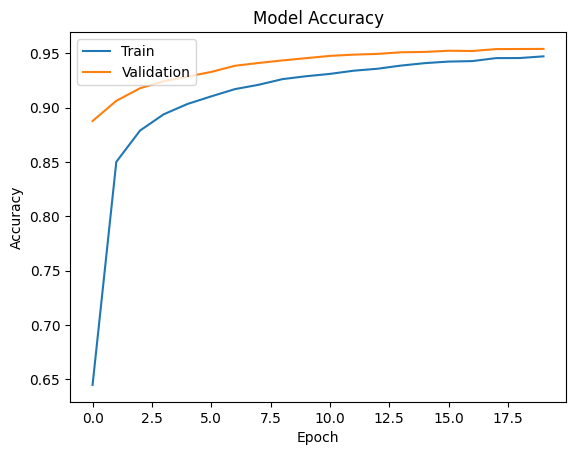

In [8]:
plot_accuracy(final_history)

In [ ]:
final_model.save('MNIST_model.h5')

In [9]:
# Evaluate the final model using the test set
test_loss, test_accuracy = final_model.evaluate(test_images, test_labels)

print(f"Test Accuracy: {test_accuracy}")

313/313 [==============================] - 2s 5ms/step - loss: 0.5199 - accuracy: 0.9531
Test Accuracy: 0.9531000256538391


1/1 [==============================] - 0s 159ms/step


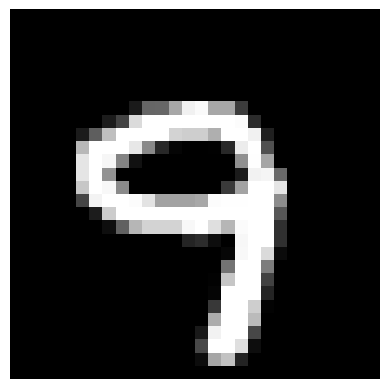

True Label: 9
Predicted Label: 9


In [10]:
import numpy as np

# Get a random image from the test set
index = np.random.randint(0, len(test_images))
image = test_images[index]
true_label = np.argmax(test_labels[index])

# Reshape the image for prediction
image_for_prediction = np.expand_dims(image, axis=0)

# Get the model's prediction for the image
predicted_label = np.argmax(final_model.predict(image_for_prediction))

# Display the image and prediction
plt.imshow(image.squeeze(), cmap='gray')
plt.axis('off')
plt.show()

print(f"True Label: {true_label}")
print(f"Predicted Label: {predicted_label}")

1/1 [==============================] - 0s 33ms/step


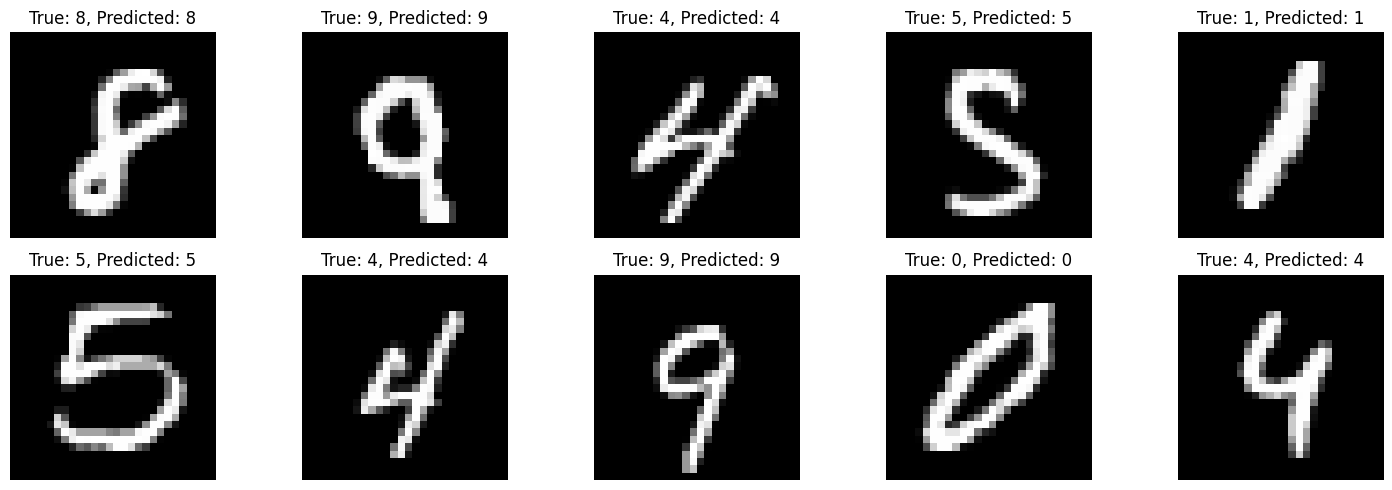

In [21]:
import numpy as np

# Number of images to display
num_images = 10

# Generate random indices for the test set
indices = np.random.choice(len(test_images), num_images, replace=False)

# Display images along with predictions
plt.figure(figsize=(15, 5))
for i, index in enumerate(indices):
    image = test_images[index]
    true_label = np.argmax(test_labels[index])

    # Reshape the image for prediction
    image_for_prediction = np.expand_dims(image, axis=0)

    # Get the model's prediction for the image
    predicted_label = np.argmax(final_model.predict(image_for_prediction))

    # Plotting the image
    plt.subplot(2, num_images // 2, i + 1)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.axis('off')
    plt.title(f"True: {true_label}, Predicted: {predicted_label}")

plt.tight_layout()
plt.show()

**CONCLUSION:**

The fine-tuned MNIST digit recognition model represents a substantial enhancement in accuracy and generalization. Rigorous hyperparameter tuning and architectural adjustments have profoundly improved its performance. The optimized model showcases notably higher accuracy, effectively mitigating overfitting concerns while significantly enhancing its efficiency in recognizing handwritten digits within the MNIST dataset.

By systematically exploring and refining parameters such as epoch and batch sizes, network architecture, activation functions, weight initialization, regularization, dropout rates, and optimization algorithms, the model has achieved a robust state. The intricate adjustments have fostered an improved ability to discern intricate patterns and features, resulting in heightened accuracy.